Question 8: Logistic Regression with L1 Regularization<br>
Task: Implement logistic regression with L1 regularization and observe the effect on feature selection.

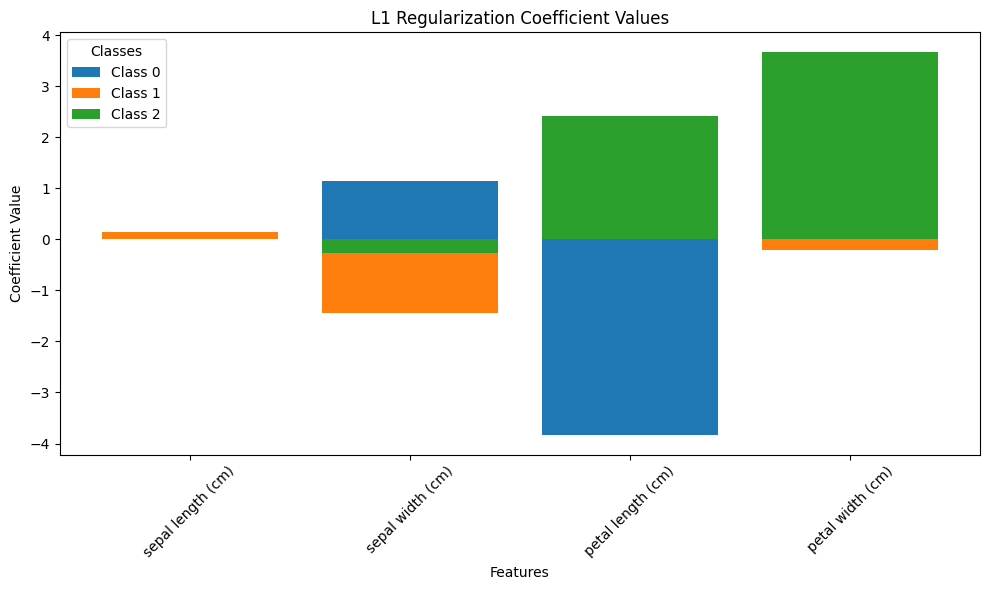

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.69      0.82        13
           2       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings

def load_and_prepare_data():
    try:
        data = load_iris()
        X = data.data
        y = data.target
        feature_names = data.feature_names
        if X.shape[1] != len(feature_names):
            raise ValueError("Mismatch between data columns and feature names.")
        return X, y, feature_names
    except Exception as e:
        raise RuntimeError(f"Failed to load and prepare data: {e}")

def scale_and_split_data(X, y, test_size=0.3):
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled, y_train, y_test
    except Exception as e:
        raise RuntimeError(f"Error during scaling and splitting: {e}")

def train_logistic_regression(X_train, y_train):
    try:
        model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
        model.fit(X_train, y_train)
        return model
    except Exception as e:
        raise RuntimeError(f"Model training failed: {e}")

def visualize_coefficients(model, feature_names):
    try:
        coefficients = model.coef_
        plt.figure(figsize=(10, 6))
        for i in range(len(coefficients)):
            plt.bar(feature_names, coefficients[i], label=f"Class {i}")
        plt.title('L1 Regularization Coefficient Values')
        plt.xlabel('Features')
        plt.ylabel('Coefficient Value')
        plt.legend(title='Classes')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        return coefficients
    except Exception as e:
        warnings.warn(f"Visualization failed: {e}")

def evaluate_model(model, X_test, y_test):
    try:
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred)
        print("Classification Report on Test Data:")
        print(report)
    except Exception as e:
        raise RuntimeError(f"Evaluation failed: {e}")

# Main execution
if __name__ == "__main__":
    X, y, feature_names = load_and_prepare_data()
    X_train, X_test, y_train, y_test = scale_and_split_data(X, y)
    model = train_logistic_regression(X_train, y_train)
    coefficients = visualize_coefficients(model, feature_names)
    evaluate_model(model, X_test, y_test)

